# Splitters
In LangChain, splitters are tools used to break documents into smaller chunks to make them easier to process by language models (like for embeddings, retrieval, or summarization). These are especially useful when working with long texts that exceed token limits or when you want to optimize context for tasks like RAG (Retrieval-Augmented Generation).

## Why Use Splitters?
LLMs have token limits (e.g., GPT-4 can only handle a certain number of tokens).

You often need chunked context for retrieval or summarization.

You want better control over semantic boundaries (e.g., split by paragraph, sentence, etc.)

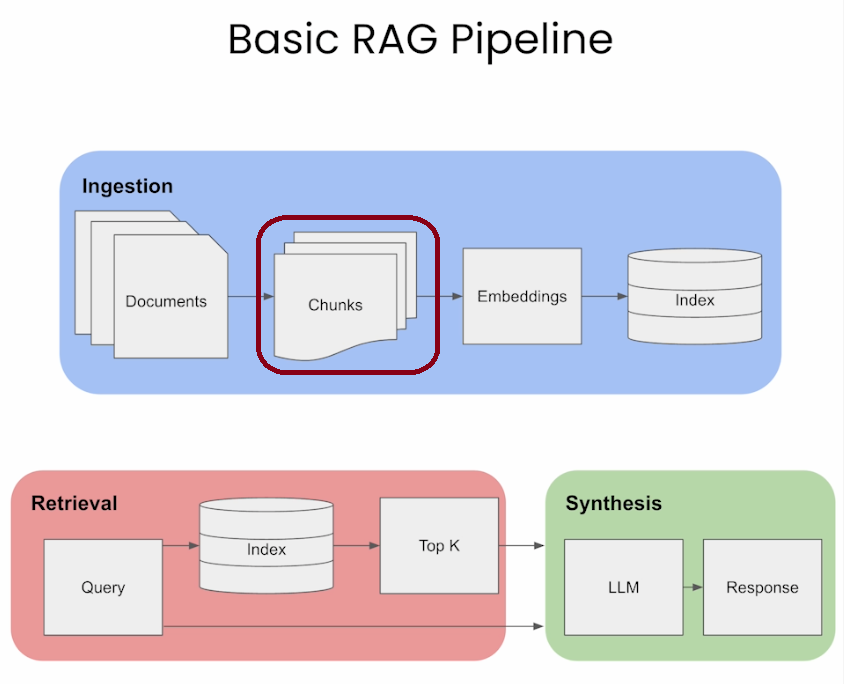

## Types of Splitters in LangChain
| Splitter                         | Based On            | Best For                                |
| -------------------------------- | ------------------- | --------------------------------------- |
| `CharacterTextSplitter`          | Character count     | Simple flat text                        |
| `RecursiveCharacterTextSplitter` | Multiple separators | Blogs, paragraphs, semi-structured docs |
| `TokenTextSplitter`              | Token count         | LLM input control                       |
| `MarkdownHeaderTextSplitter`     | Markdown headers    | Docs, README.md, blogs                  |
| `HTMLHeaderTextSplitter`         | HTML tags           | Web pages, structured HTML              |
| `LanguageAwareSplitter`          | Programming syntax  | Code (experimental)                     |
| `PythonCodeSplitter`             | Python structure    | Python files                            |


In [4]:
!pip install openai langchain

# Importing Pakages for Splitters

In [5]:
from langchain.text_splitter import RecursiveCharacterTextSplitter, CharacterTextSplitter

## Defining the Chunk Size

In [6]:
chunk_size = 26
overlap = 4

## Parameters in Splitters

In [7]:
c_splitter = CharacterTextSplitter(
    chunk_size = chunk_size,
    # separator= "\n\n"
    chunk_overlap = overlap
)

r_splitter = RecursiveCharacterTextSplitter(
    chunk_size = chunk_size,
    # separators=["\n","\n\n"," ",""],
    chunk_overlap = overlap
)

# Splitter Example 1

it would not split the text1 into chunks beacuse the string size is 26 and the chunk size define was also 26

In [8]:
text1 = 'abcdefghijklmnopqrstuvwxyz'

In [9]:
text1

'abcdefghijklmnopqrstuvwxyz'

In [10]:
c_splitter.split_text(text1)

['abcdefghijklmnopqrstuvwxyz']

In [11]:
r_splitter.split_text(text1)

['abcdefghijklmnopqrstuvwxyz']

# Splitter Example 2

In [12]:
text2 = 'abcdefghijklmnopqrstuvwxyzabcdefghijklm'

In [13]:
text2

'abcdefghijklmnopqrstuvwxyzabcdefghijklm'

In [14]:
r_splitter.split_text(text2)

['abcdefghijklmnopqrstuvwxyz', 'wxyzabcdefghijklm']

In [15]:
c_splitter.split_text(text2)

['abcdefghijklmnopqrstuvwxyzabcdefghijklm']

When you do not specify a separator, LangChain internally uses default behavior where it tries to split on whitespace.

But your string text2 = 'abcdefghijklmnopqrstuvwxyzabcdefghijklm' contains no spaces, so LangChain treats the whole string as a single chunk, and returns a single item (as long as it's under length_function, which defaults to len(text)).

In [16]:
c_splitter = CharacterTextSplitter(
    separator="",          # <-- required for strict character-level splitting
    chunk_size=26,
    chunk_overlap=4)
chunks = c_splitter.split_text(text2)
print(chunks)


['abcdefghijklmnopqrstuvwxyz', 'wxyzabcdefghijklm']


# Complete pipeline Loading -> Splitting -> **Embedding**

In [17]:
!pip install langchain langchain-community

## Document Loader

In [18]:
! pip install pypdf

In [19]:
from langchain.document_loaders import PyPDFLoader

In [21]:
loader = PyPDFLoader('/content/PanaversityCertifiedAgenticandRoboticAIEngineer.pdf')
pages = loader.load()

In [22]:
len(pages)

36

In [23]:
pages[5]

Document(metadata={'producer': 'Microsoft® Word 2019', 'creator': 'Microsoft® Word 2019', 'creationdate': '2025-06-25T11:57:36+05:00', 'author': 'M Ehtesham Ul Hassan', 'moddate': '2025-06-25T11:57:36+05:00', 'source': '/content/PanaversityCertifiedAgenticandRoboticAIEngineer.pdf', 'total_pages': 36, 'page': 5, 'page_label': '6'}, page_content="6 \ndevelopment process with strong typing and advanced features. This part \nconcludes with a project, allowing learners to develop a complete AI agent \nfrontend, combining their Knowledge Graphs with modern web technologies \nfor a seamless user experience. \nLearning Repo: https://github.com/panaversity/learn-applied-generative-ai-\nfundamentals/  \n \n● Quarter 4: Cloud Native AI \nBuild scalable AI Powered APIs using FastAPI, GQL, Neo4j, Kafka, Kong, \nGenAI APIs like OpenAI Chat Completion APIs, Assistant APIs, LangChain \nand Open Source AI LLMs, develop them using Containers and Dev \nContainers, and deploy them using Docker Compose loc

In [24]:
print(pages[5].page_content[0:500])

6 
development process with strong typing and advanced features. This part 
concludes with a project, allowing learners to develop a complete AI agent 
frontend, combining their Knowledge Graphs with modern web technologies 
for a seamless user experience. 
Learning Repo: https://github.com/panaversity/learn-applied-generative-ai-
fundamentals/  
 
● Quarter 4: Cloud Native AI 
Build scalable AI Powered APIs using FastAPI, GQL, Neo4j, Kafka, Kong, 
GenAI APIs like OpenAI Chat Completion APIs, As


## Chunk

In [29]:
chunk_list=[]
for page in pages:
  chunks=r_splitter.split_text(page.page_content)
  for chunk in chunks:
    chunk_list.append(chunk)
print(len(chunk_list))

3862


In [31]:
chunk_list[1200]

'the cloud.'

## Embeddings
Embeddings are numerical vector representations of text (words, sentences, documents) that capture semantic meaning.

Think of them as a way to translate language into math so we can:
- Measure similarity between texts
- Search for relevant information
- Enable vector-based retrieval (like in RAG)

### Key Uses of Embeddings
| Use Case                             | Description                                             |
| ------------------------------------ | ------------------------------------------------------- |
| Semantic Search                      | Find relevant content, even if it's phrased differently |
| RAG (Retrieval-Augmented Generation) | Fetch relevant documents to provide to an LLM           |
| Clustering                           | Group similar content                                   |
| Classification                       | Use vector features for ML models                       |
| Recommendation Systems               | Find similar documents or queries                       |


In [32]:
! pip install transformers langchain_huggingface

In [33]:
from langchain_huggingface import HuggingFaceEmbeddings

In [34]:
embed_model = HuggingFaceEmbeddings(model_name='BAAI/bge-small-en-v1.5')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/94.8k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/133M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/366 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

### Generate Embeddings

In [35]:
embed = embed_model.embed_query('How are you?')

In [36]:
len(embed)

384

In [38]:
embed

[-0.032435093075037,
 -0.05979365482926369,
 0.036402419209480286,
 -0.02690999209880829,
 -0.02366415224969387,
 0.006479899398982525,
 0.13852956891059875,
 0.033140379935503006,
 -0.0025555116590112448,
 0.002053940901532769,
 0.0028571945149451494,
 -0.09473004192113876,
 0.05716605857014656,
 0.026267345994710922,
 0.06191157549619675,
 0.023630011826753616,
 0.04363709315657616,
 -0.12983235716819763,
 -0.14028261601924896,
 0.01821664720773697,
 -0.08630460500717163,
 -0.000646583444904536,
 -0.03165006637573242,
 -0.043535806238651276,
 -0.03131565824151039,
 -0.002692142501473427,
 0.019646890461444855,
 -0.004783591255545616,
 -0.0530797615647316,
 0.0016580187948420644,
 -0.037133291363716125,
 0.0020965144503861666,
 0.0498342327773571,
 0.025686947628855705,
 0.02816847339272499,
 0.010681982152163982,
 -0.02091001719236374,
 0.0006300299428403378,
 -0.01644856482744217,
 0.006235414184629917,
 0.021730827167630196,
 -0.01993246003985405,
 -0.044062886387109756,
 -0.078797

# Semantic Splitters
Splits the text based on semantic similarity.

At a high level, this splits into sentences, then groups into groups of 3 sentences, and then merges one that are similar in the embedding space.

In [41]:
!pip install langchain_experimental

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.2/209.2 kB 15.2 MB/s eta 0:00:00


In [43]:
from langchain_experimental.text_splitter import SemanticChunker

In [45]:
text_splitter = SemanticChunker(
    embed_model, breakpoint_threshold_type="percentile"
)

In [49]:
paragraph = """
"LangChain was launched in October 2022 as an open source project by Harrison Chase, while working at machine learning startup Robust Intelligence. The project quickly garnered popularity,with improvements from hundreds of contributors on GitHub, trending discussions on Twitter, lively activity on the project's Discord server, many YouTube tutorials, and meetups in San Francisco and London. In April 2023, LangChain had incorporated and the new startup raised over $20 million in funding at a valuation of at least $200 million from venture firm Sequoia Capital, a week after announcing a $10 million seed investment from Benchmark."
"""

In [50]:
sementic_splits = text_splitter.split_text(paragraph)

In [51]:
len(sementic_splits)

2

In [52]:
sementic_splits[0]

'\n"LangChain was launched in October 2022 as an open source project by Harrison Chase, while working at machine learning startup Robust Intelligence. The project quickly garnered popularity,with improvements from hundreds of contributors on GitHub, trending discussions on Twitter, lively activity on the project\'s Discord server, many YouTube tutorials, and meetups in San Francisco and London.'

In [53]:
sementic_splits[1]

'In April 2023, LangChain had incorporated and the new startup raised over $20 million in funding at a valuation of at least $200 million from venture firm Sequoia Capital, a week after announcing a $10 million seed investment from Benchmark."\n'

In [54]:
sementic_embed = embed_model.embed_query(sementic_splits[0])

In [55]:
sementic_embed

[-0.043105773627758026,
 -0.05892844498157501,
 -0.08727515488862991,
 -0.010878652334213257,
 0.023745227605104446,
 -0.026706034317612648,
 -0.02660873904824257,
 -0.00013656308874487877,
 -0.019800228998064995,
 -0.04774001985788345,
 0.035279225558042526,
 -0.02435123361647129,
 0.014463169500231743,
 0.03855215385556221,
 -0.0004435283481143415,
 0.01180426124483347,
 -0.024047132581472397,
 -0.08130333572626114,
 0.0983273983001709,
 -0.010684159584343433,
 0.013149427250027657,
 -0.012541569769382477,
 -0.009585576131939888,
 -0.07147201895713806,
 0.04055830463767052,
 0.08806780725717545,
 0.06539400666952133,
 -0.07069743424654007,
 0.006287652999162674,
 -0.1717674732208252,
 0.011997656896710396,
 -0.011656154878437519,
 0.053020406514406204,
 -0.03929074853658676,
 -0.01251284871250391,
 0.05867266282439232,
 -0.02632412128150463,
 0.022039150819182396,
 -0.0028454356361180544,
 0.025016244500875473,
 -0.015540030784904957,
 -0.03236604481935501,
 0.010617383755743504,
 -0

In [56]:
len(sementic_embed)

384